### KDSB Dataset Exploration

Interesting cases:
    
- High density (possibly 3D) example: 

```
a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288
```

- Large number of nucei: 

```
['a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288',
 '0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1',
 '07fb37aafa6626608af90c1e18f6a743f29b6b233d2e427dcd1102df6a916cf5',
 '20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f',
 '5afb7932e9c7328f4fb1d7a8166a3699d6cdc5192b93758a75e9956f1513c5a3',
 '8efed2e62c919e6d70a2ab548b1a33014877fe8a23f177ef25a9dee25ffe8842',
 '547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6',
 'c304a1fdf3bca2f4b4580d2cac59942e2224a7678001bf5ed9d9852f57708932',
 'cb4df20a83b2f38b394c67f1d9d4aef29f9794d5345da3576318374ec3a11490',
 '6fe2df6de1d962b90146c822bcefc84d0d3d6926fdfbacd3acdc9de830ee5622']
 ```

In [1]:
%run ../kdsb_io.py

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvutils import visualize

data_dir = osp.join(os.environ['CODEX_DATA_DIR'], 'modeling', 'cytopy', 'datasets', 'kdsb2018', 'stage1_train')
meta_dir = osp.join(os.environ['CODEX_DATA_DIR'], 'modeling', 'cytopy', 'datasets', 'kdsb2018', 'stage1_meta')

In [3]:
df = get_image_metadata(osp.join(meta_dir, 'classes.csv'), data_dir)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 13 columns):
filename      735 non-null object
foreground    735 non-null object
background    735 non-null object
fileid        735 non-null object
localdir      735 non-null object
localpath     735 non-null object
exists        735 non-null bool
nmasks        670 non-null float64
ndim          670 non-null float64
height        670 non-null float64
width         670 non-null float64
channels      670 non-null float64
dtype         670 non-null object
dtypes: bool(1), float64(5), object(7)
memory usage: 69.7+ KB


In [4]:
df.groupby(['foreground', 'background']).size()

foreground  background
black       white          16
purple      purple         71
            white          41
            yellow          8
white       black         599
dtype: int64

In [5]:
df['channels'].value_counts()

4.0    670
Name: channels, dtype: int64

In [6]:
df['exists'].value_counts()

True     670
False     65
Name: exists, dtype: int64

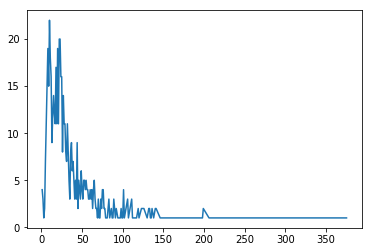

In [7]:
df['nmasks'].value_counts().sort_index().plot()

In [8]:
df.groupby(['height', 'width']).size().unstack().fillna(0).astype(int)

width,256.0,320.0,347.0,360.0,640.0,696.0,1024.0,1272.0,1388.0
height,,,,,,,,,
256.0,334,112,0,0,0,0,0,0,0
260.0,0,0,5,0,0,0,0,0,0
360.0,0,0,0,91,0,0,0,0,0
512.0,0,0,0,0,13,0,0,0,0
520.0,0,0,0,0,0,92,0,0,0
603.0,0,0,0,0,0,0,0,6,0
1024.0,0,0,0,0,0,0,16,0,0
1040.0,0,0,0,0,0,0,0,0,1


In [9]:
df[(df['foreground'] == 'white') & (df['background'] == 'black')]\
    .groupby(['height', 'width']).size().unstack().fillna(0).astype(int)

width,256.0,320.0,347.0,360.0,640.0,696.0,1272.0,1388.0
height,,,,,,,,
256.0,334,4,0,0,0,0,0,0
260.0,0,0,5,0,0,0,0,0
360.0,0,0,0,91,0,0,0,0
512.0,0,0,0,0,13,0,0,0
520.0,0,0,0,0,0,92,0,0
603.0,0,0,0,0,0,0,6,0
1040.0,0,0,0,0,0,0,0,1


## Load Image Data

In [39]:
%run ../kdsb_io.py

In [11]:
df_train = df[df['exists']].copy()
df_train['index'] = np.arange(len(df_train))

In [12]:
# Generate list of file ids to load so that they can be correlated with metadata
ids = df_train['fileid'].tolist()
len(ids)

670

In [40]:
%%time
I, X, Y, class_names = load_images(data_dir, (256, 256, 1), ids=ids, resize_mode='crop')


100%|██████████| 670/670 [07:56<00:00,  1.41it/s]
/usr/local/lib/python3.5/dist-packages/skimage/exposure/exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


CPU times: user 7min 49s, sys: 7.11 s, total: 7min 56s
Wall time: 7min 58s


In [63]:
def display(idx, size, classes=class_names, cols=None):
    if cols is None:
        cols = len(class_names) + 1
    images = []
    for i in idx:
        images.append(X[i, ..., 0])
        for c in range(Y.shape[-1]):
            images.append(Y[i, ..., c])
    visualize.display_images(images, size=size, cols=cols)

In [61]:
X.dtype, X.shape, Y.dtype, Y.shape

(dtype('uint8'), (2224, 256, 256, 1), dtype('bool'), (2224, 256, 256, 5))

In [62]:
class_names

['bg', 'nuc_interior', 'nuc_boundary', 'nuc_partition', 'nuc_center']

### Arbitrary sample

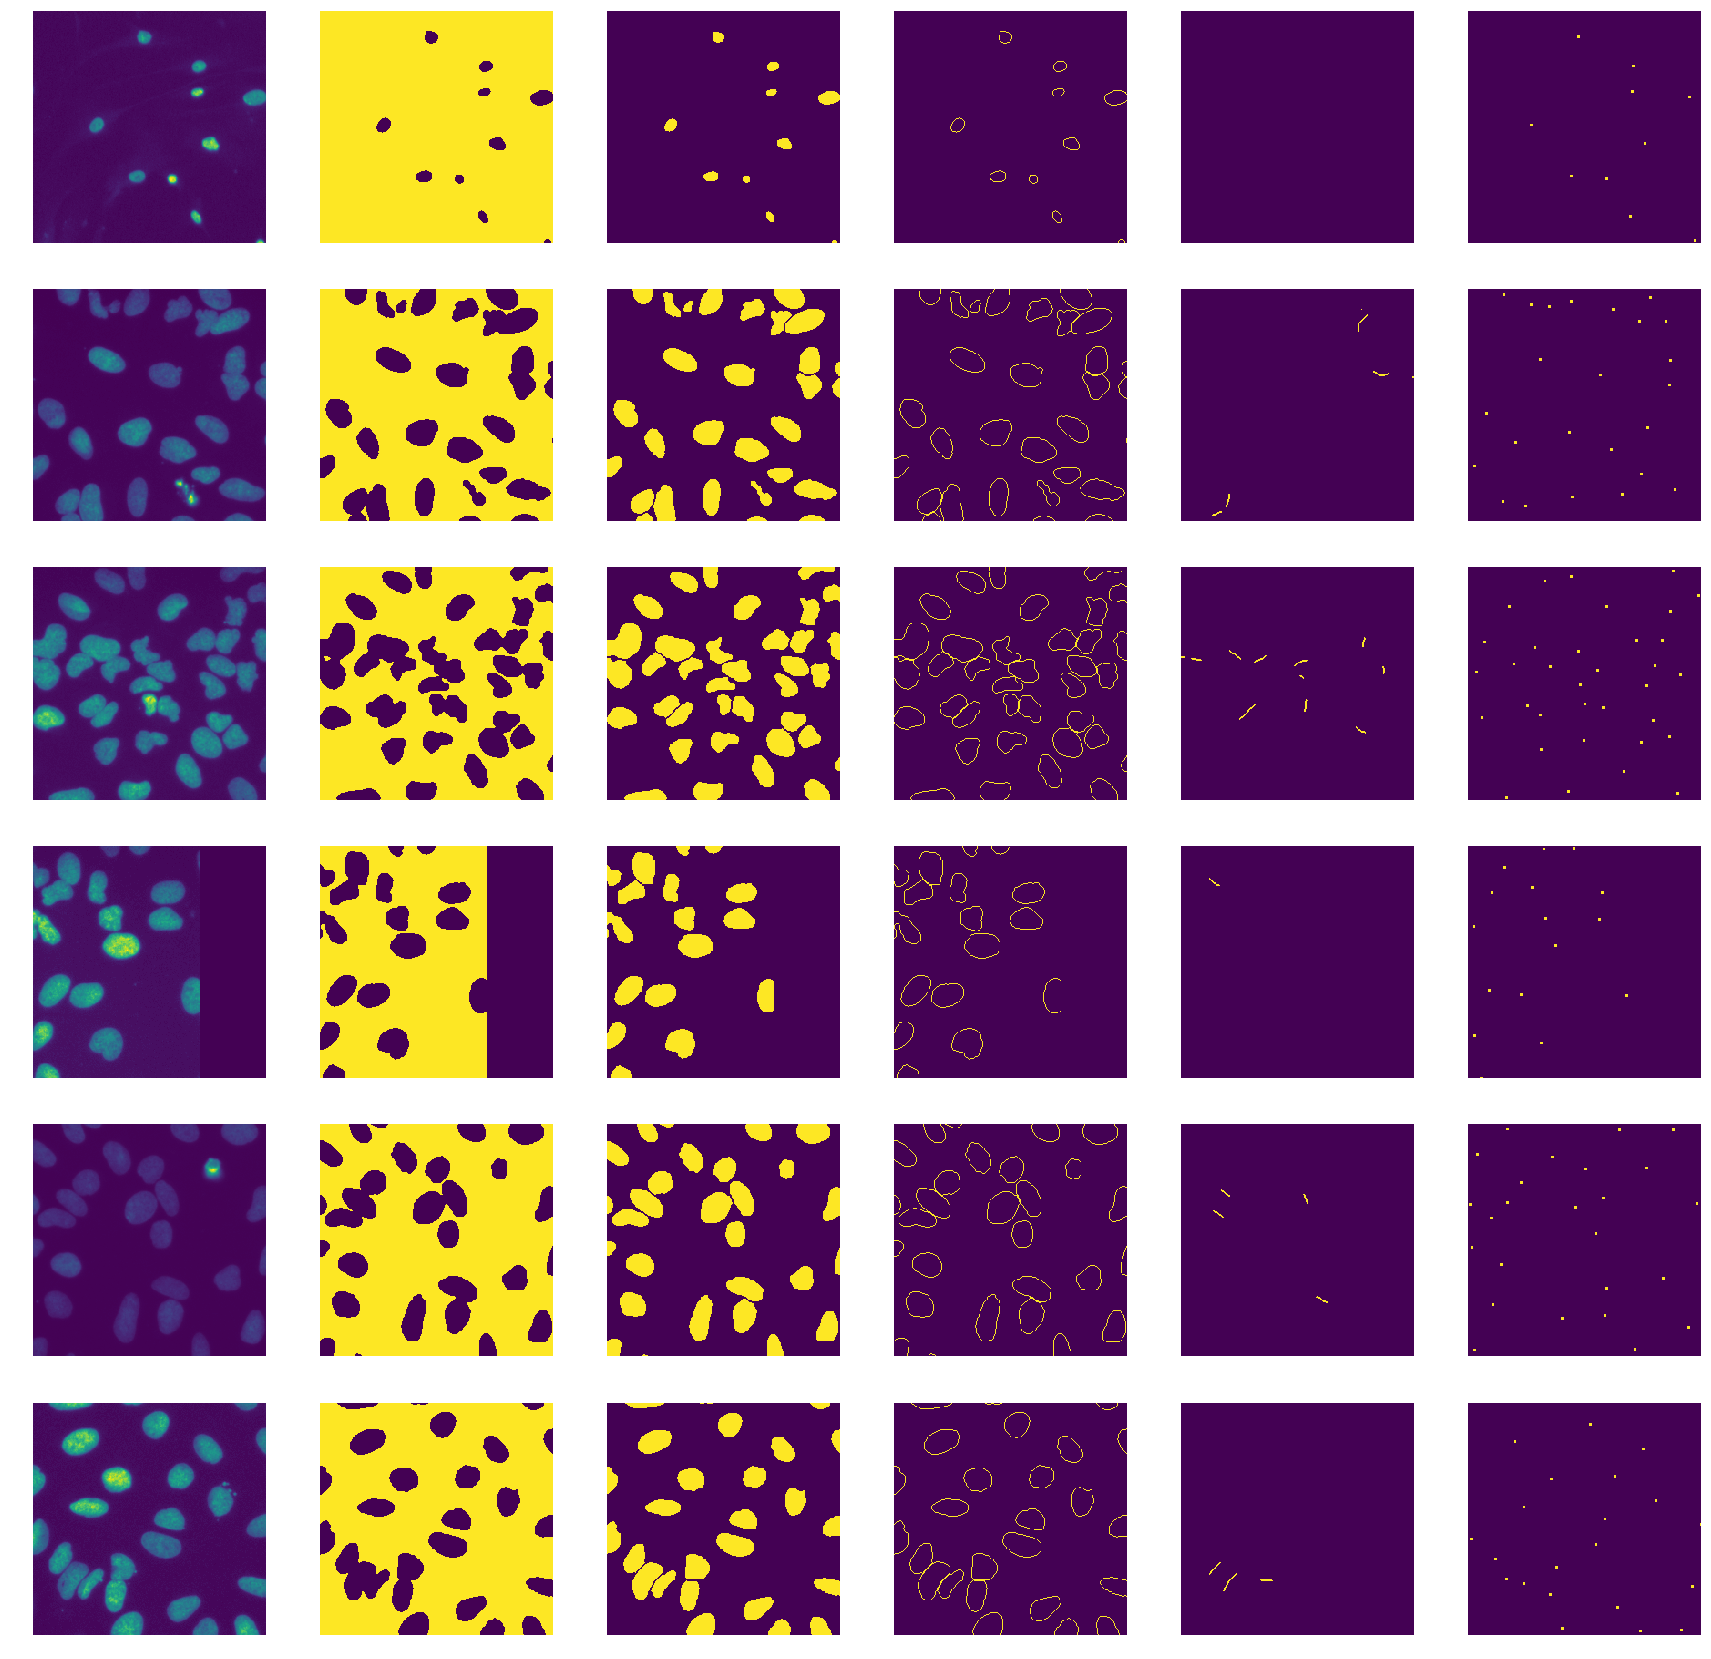

In [64]:
display([0, 1, 2, 3, 4, 5], 30)

### High-Density Samples

In [70]:
df_train.sort_values('nmasks', ascending=False).head(10)['fileid'].tolist()

['a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288',
 '0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1',
 '07fb37aafa6626608af90c1e18f6a743f29b6b233d2e427dcd1102df6a916cf5',
 '20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f',
 '5afb7932e9c7328f4fb1d7a8166a3699d6cdc5192b93758a75e9956f1513c5a3',
 '8efed2e62c919e6d70a2ab548b1a33014877fe8a23f177ef25a9dee25ffe8842',
 '547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6',
 'c304a1fdf3bca2f4b4580d2cac59942e2224a7678001bf5ed9d9852f57708932',
 'cb4df20a83b2f38b394c67f1d9d4aef29f9794d5345da3576318374ec3a11490',
 '6fe2df6de1d962b90146c822bcefc84d0d3d6926fdfbacd3acdc9de830ee5622']

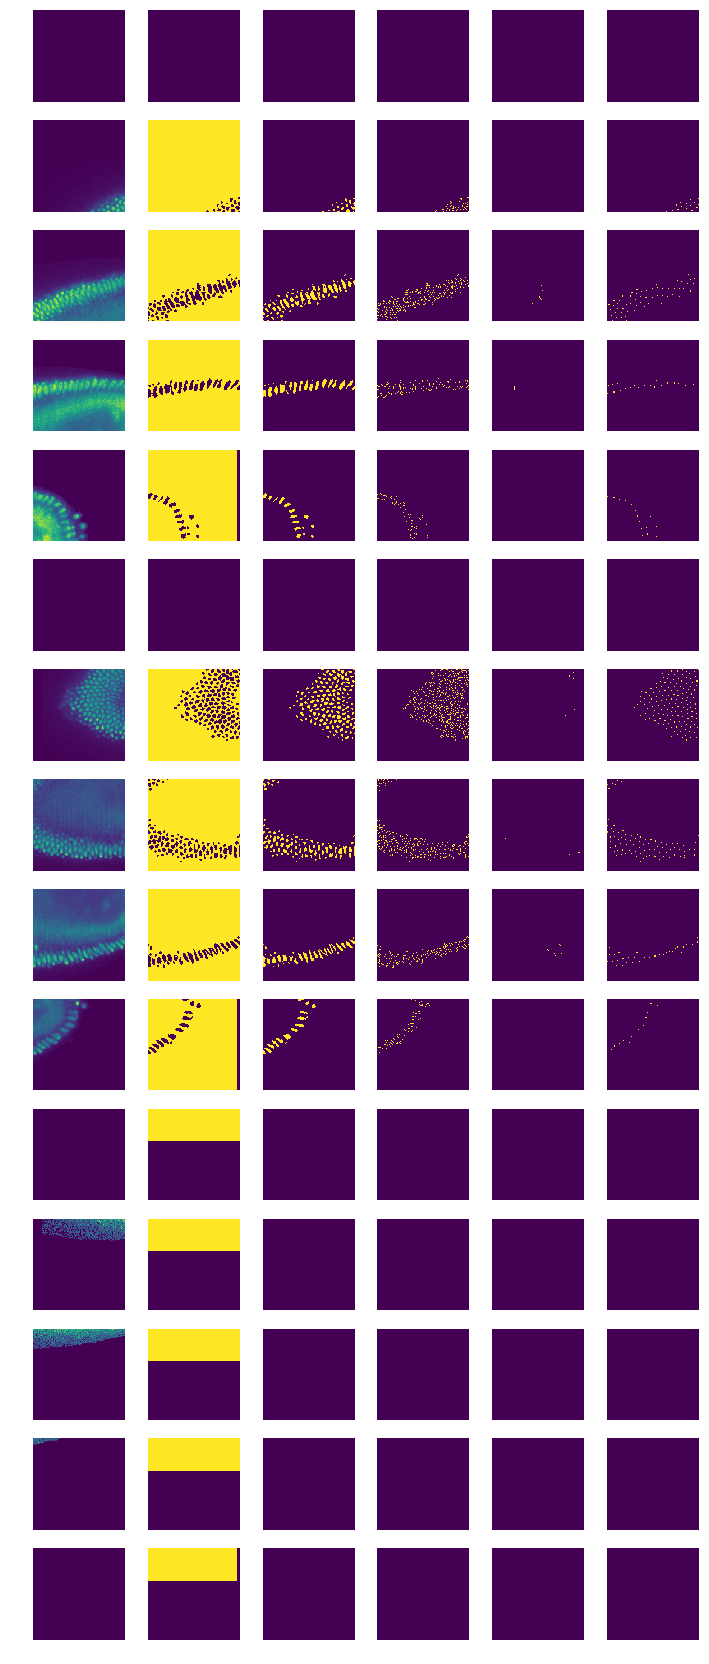

In [65]:
idx = np.argwhere(I == 'a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288').ravel()
display(idx, 12)

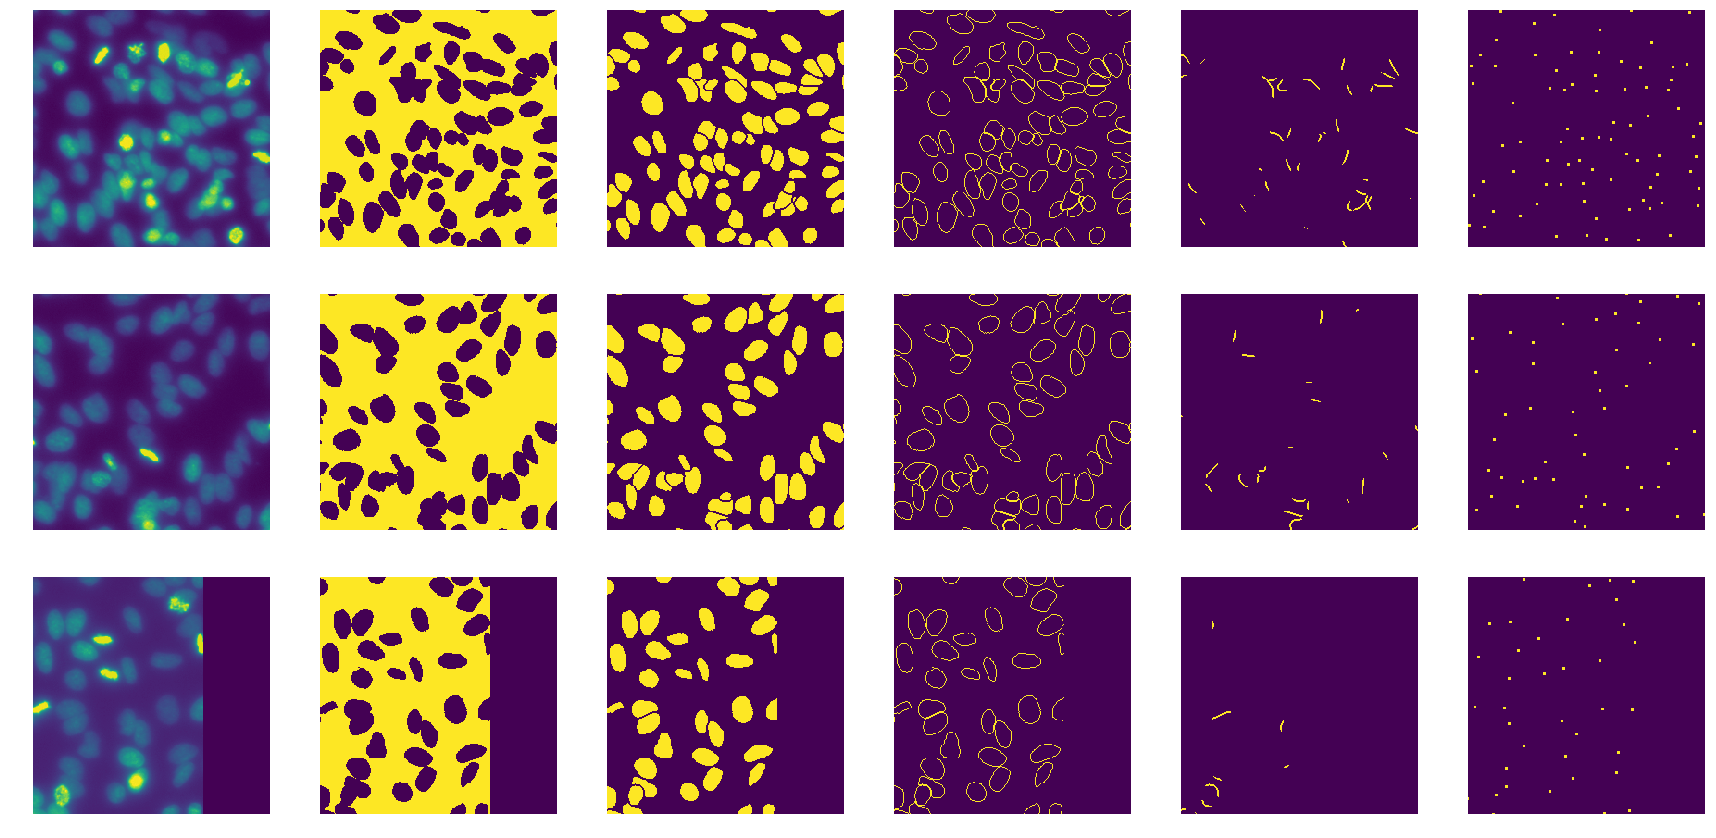

In [66]:
# Another high density sample
idx = np.argwhere(I == '0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1').ravel()
display(idx[:3], 30)

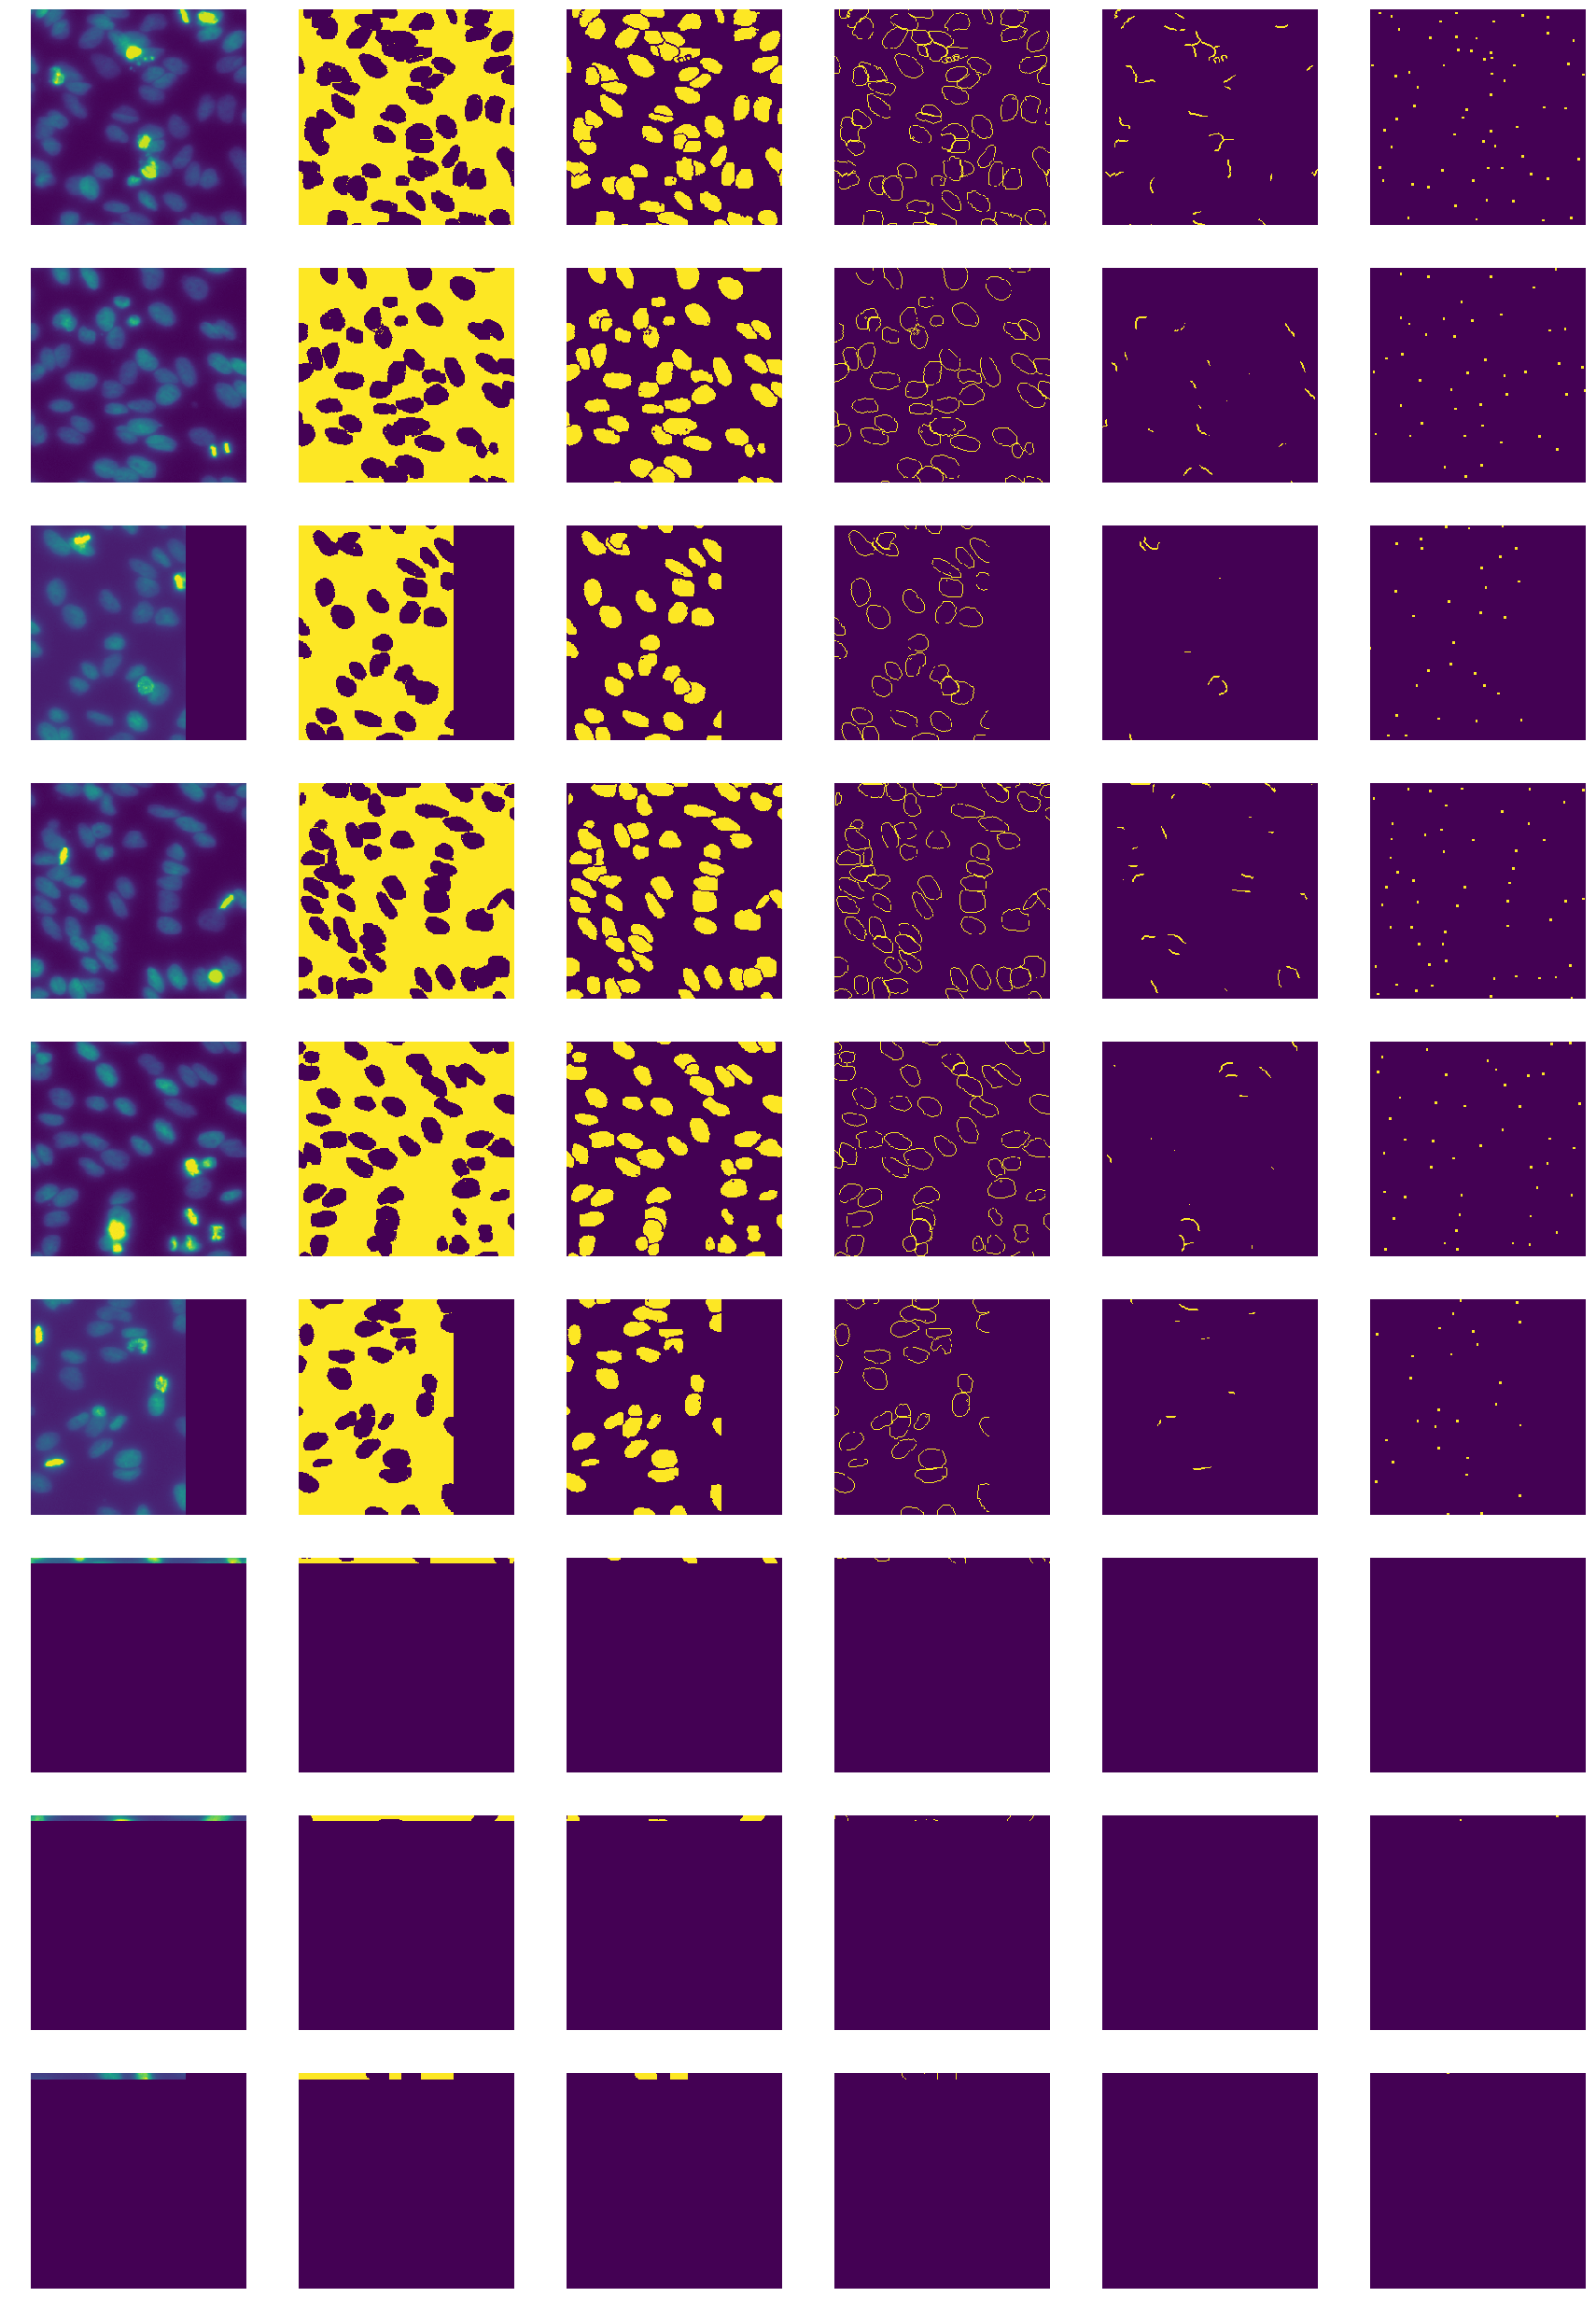

In [67]:
idx = np.argwhere(I == '547ef286ee5f4e5dce533e982e6992ada67b7d727fdd3cfa6576f24c631a7ae6').ravel()
display(idx, 30)

### High-Res Sample

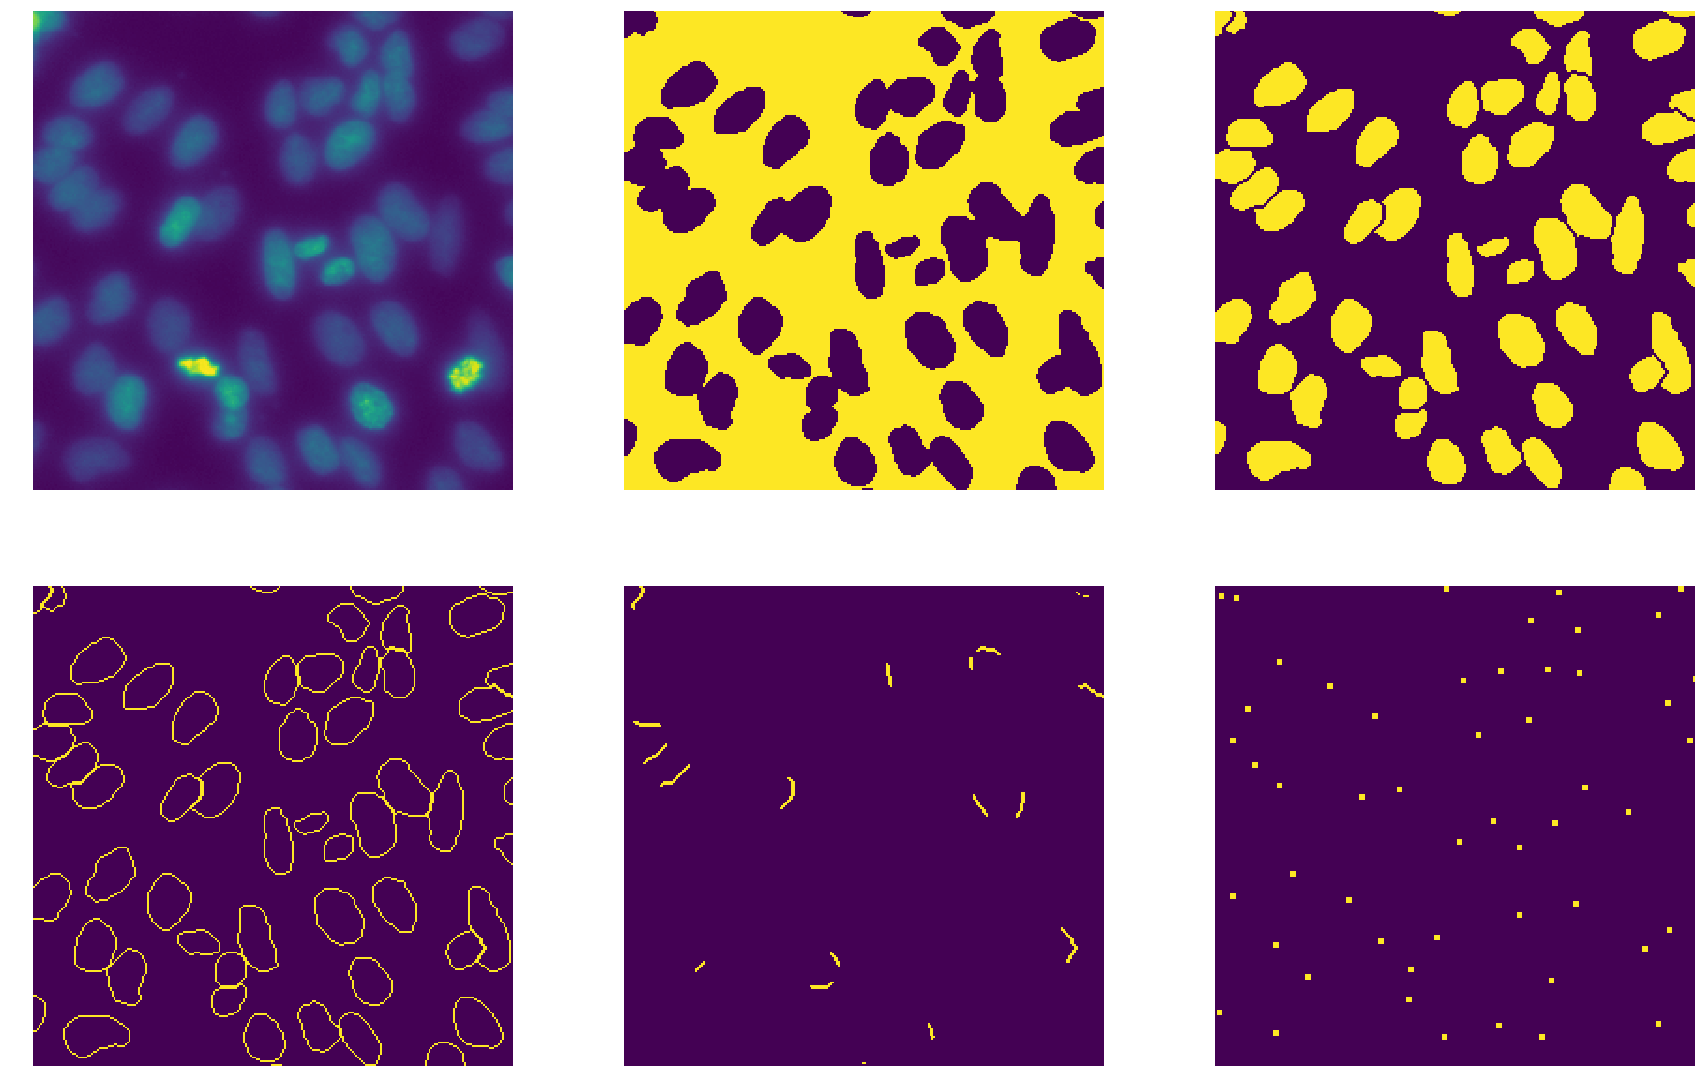

In [69]:
idx = np.argwhere(I == '5afb7932e9c7328f4fb1d7a8166a3699d6cdc5192b93758a75e9956f1513c5a3').ravel()
display(idx[:1], 30, cols=3)

[49, 255, 413, 236, 517, 391, 203, 415, 73, 15]


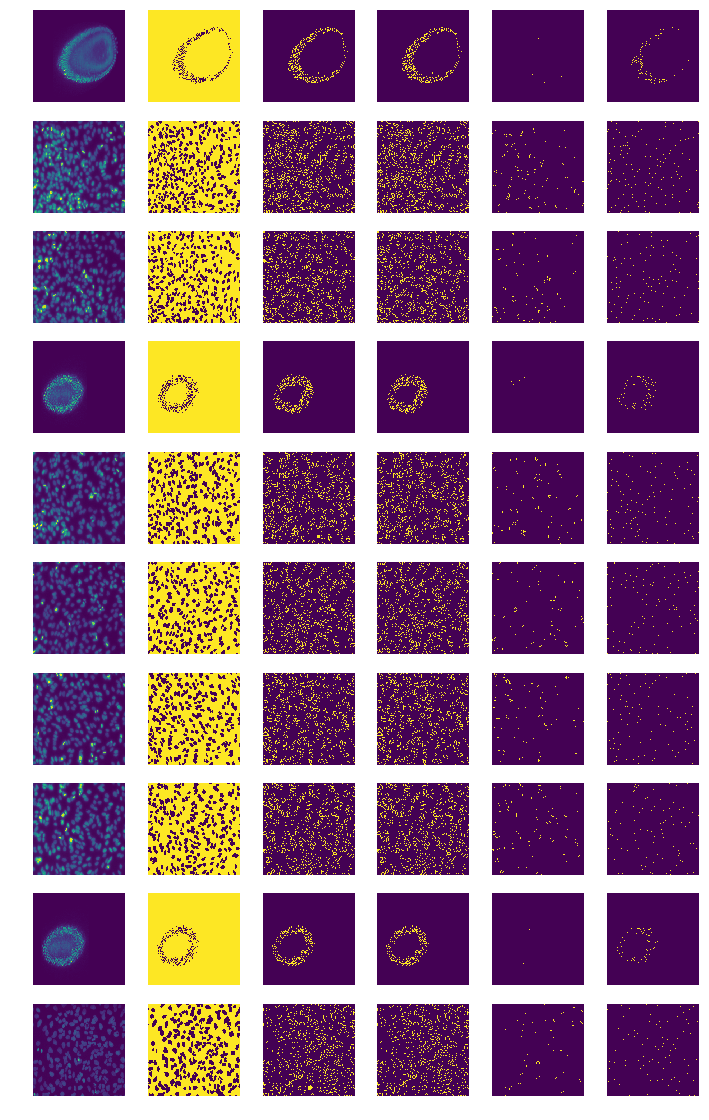

In [88]:
# Non-cropped sample
display(idx, 12)